# 시계열 데이터를 쉽게 다루기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
air_quality = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/air_quality_no2_long.csv')

In [4]:
air_quality.head(2)

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³


In [9]:
air_quality = air_quality.rename(columns={"date.utc":'datetime'})

In [11]:
air_quality.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [15]:
## datetime object로 변환
air_quality['datetime'] = pd.to_datetime(air_quality['datetime'])

In [16]:
air_quality.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00,FR04014,no2,21.4,µg/m³


In [17]:
air_quality['datetime'].min(), air_quality['datetime'].max()

(Timestamp('2019-05-07 01:00:00'), Timestamp('2019-06-21 00:00:00'))

In [18]:
air_quality['datetime'].max() - air_quality['datetime'].min()

Timedelta('44 days 23:00:00')

In [19]:
## 새로운 열로 월을 추가
air_quality['month'] = air_quality['datetime'].dt.month

In [20]:
air_quality.head(2)

,city,country,datetime,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00,FR04014,no2,21.8,µg/m³,6


In [21]:
## 요일별, 지역별 오염 값의 평균을 구하기
air_quality.groupby([air_quality['datetime'].dt.weekday, 'location'])['value'].mean()

datetime  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

Text(0,0.5,'$NO_2 (ug/m^3)$')

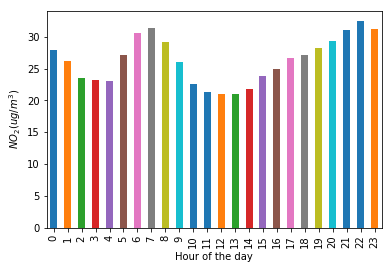

In [24]:
## 시간대별 오염도의 그래프
air_quality.groupby([air_quality['datetime'].dt.hour])['value'].mean().plot(kind='bar')
plt.xlabel('Hour of the day')
plt.ylabel('$NO_2 (ug/m^3)$')

## datetime을 인덱스로

In [25]:
## pivotting
no_2 = air_quality.pivot(index='datetime', columns='location', values='value')

In [27]:
no_2.head(5)

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00,50.5,25.0,23.0
2019-05-07 02:00:00,45.0,27.7,19.0
2019-05-07 03:00:00,NaN,50.4,19.0
2019-05-07 04:00:00,NaN,61.9,16.0
2019-05-07 05:00:00,NaN,72.4,NaN


In [28]:
no_2.index

DatetimeIndex(['2019-05-07 01:00:00', '2019-05-07 02:00:00',
               '2019-05-07 03:00:00', '2019-05-07 04:00:00',
               '2019-05-07 05:00:00', '2019-05-07 06:00:00',
               '2019-05-07 07:00:00', '2019-05-07 08:00:00',
               '2019-05-07 09:00:00', '2019-05-07 10:00:00',
               ...
               '2019-06-20 15:00:00', '2019-06-20 16:00:00',
               '2019-06-20 17:00:00', '2019-06-20 18:00:00',
               '2019-06-20 19:00:00', '2019-06-20 20:00:00',
               '2019-06-20 21:00:00', '2019-06-20 22:00:00',
               '2019-06-20 23:00:00', '2019-06-21 00:00:00'],
              dtype='datetime64[ns]', name='datetime', length=1033, freq=None)

In [31]:
no_2.index.year, no_2.index.weekday

(Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
             ...
             2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
            dtype='int64', name='datetime', length=1033),
 Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
             ...
             3, 3, 3, 3, 3, 3, 3, 3, 3, 4],
            dtype='int64', name='datetime', length=1033))

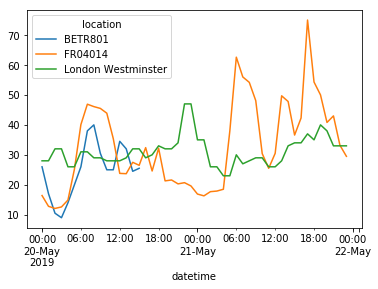

In [34]:
no_2['20190520':'20190521'].plot()

### 시계열 데이터를 다른 주기로 변환하기

In [35]:
no_2.head(5)

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00,50.5,25.0,23.0
2019-05-07 02:00:00,45.0,27.7,19.0
2019-05-07 03:00:00,NaN,50.4,19.0
2019-05-07 04:00:00,NaN,61.9,16.0
2019-05-07 05:00:00,NaN,72.4,NaN


In [37]:
monthly_max = no_2.resample('M').max()  ## groupby와 유사, 데이터가 시계열인 경우 적용

In [38]:
monthly_max

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-31,74.5,97.0,97.0
2019-06-30,52.5,84.7,52.0


In [39]:
monthly_max.index

DatetimeIndex(['2019-05-31', '2019-06-30'], dtype='datetime64[ns]', name='datetime', freq='M')

In [40]:
monthly_max.index.freq

<MonthEnd>

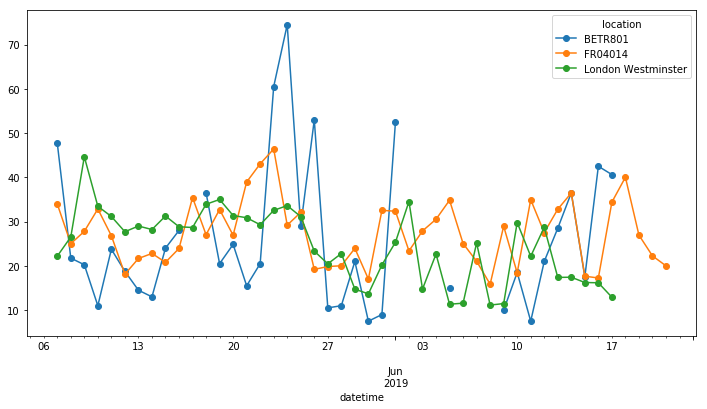

In [43]:
no_2.resample('D').mean().plot(style='-o', figsize=(12,6))